In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


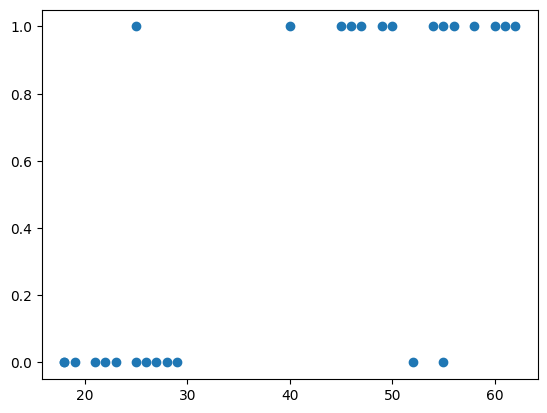

In [4]:
plt.scatter(df.age,df.bought_insurance)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(df[['age']],df.bought_insurance,train_size=0.9)

In [9]:
x_test

,age
7,60
20,21
18,19


In [11]:
from sklearn import linear_model

In [12]:
reg =linear_model.LogisticRegression()

In [13]:
reg.fit(x_train,y_train)

LogisticRegression()

In [14]:
reg.predict(x_test)

array([1, 0, 0], dtype=int64)

In [15]:
reg.score(x_test,y_test)

1.0

In [16]:
reg.predict_proba(x_test)

array([[0.06119275, 0.93880725],
       [0.90303472, 0.09696528],
       [0.92314523, 0.07685477]])

In [20]:
df=pd.read_csv("HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [21]:
df.groupby('left').mean()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_12084\588011459.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='promotion_last_5years'>

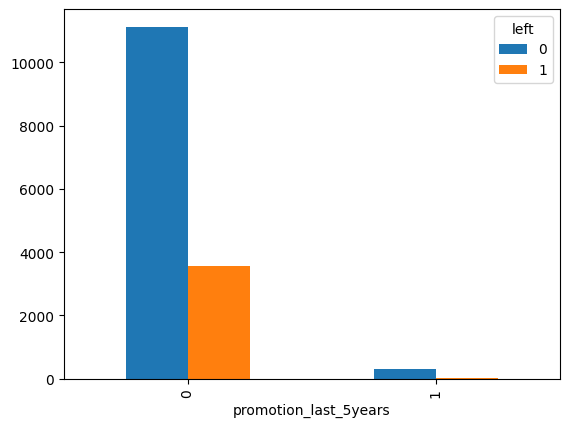

In [26]:
pd.crosstab(df.promotion_last_5years,df.left).plot(kind='bar')

<Axes: xlabel='Department'>

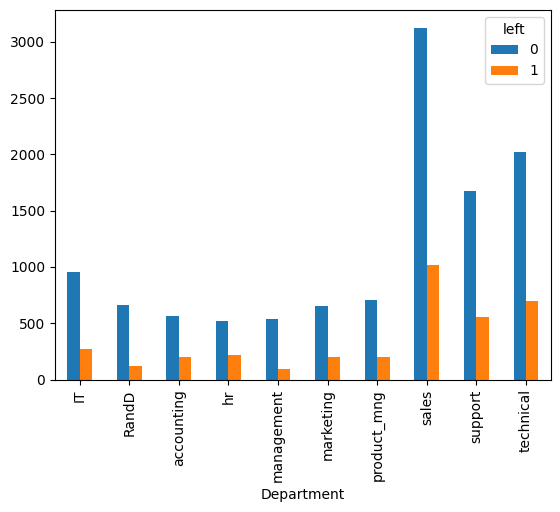

In [25]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [44]:
subdf=df[['satisfaction_level','average_montly_hours','average_montly_hours','promotion_last_5years','salary']]
y=df.left

In [45]:
dummies=pd.get_dummies(df.salary)
dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [46]:
merged=pd.concat([subdf,dummies],axis=1)
X=merged.drop(['salary'],axis=1)
X

,satisfaction_level,average_montly_hours,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,157,0,0,1,0
1,0.80,262,262,0,0,0,1
2,0.11,272,272,0,0,0,1
3,0.72,223,223,0,0,1,0
4,0.37,159,159,0,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,151,0,0,1,0
14995,0.37,160,160,0,0,1,0
14996,0.37,143,143,0,0,1,0
14997,0.11,280,280,0,0,1,0


In [47]:
final=merged.drop(['salary','medium'],axis=1)
final

,satisfaction_level,average_montly_hours,average_montly_hours,promotion_last_5years,high,low
0,0.38,157,157,0,0,1
1,0.80,262,262,0,0,0
2,0.11,272,272,0,0,0
3,0.72,223,223,0,0,1
4,0.37,159,159,0,0,1
...,...,...,...,...,...,...
14994,0.40,151,151,0,0,1
14995,0.37,160,160,0,0,1
14996,0.37,143,143,0,0,1
14997,0.11,280,280,0,0,1


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)
model=linear_model.LogisticRegression()

In [52]:
model.fit(X_train,y_train)

LogisticRegression()

In [53]:
model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [54]:
y_test

219      1
13296    0
10183    0
10126    0
347      1
        ..
14039    0
8948     0
12937    0
7412     0
11607    0
Name: left, Length: 10500, dtype: int64

In [55]:
model.score(X_test,y_test)

0.7783809523809524